<a href="https://colab.research.google.com/github/kommalina/AI_detection/blob/main/notebooks/AI_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub

import os
import shutil

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from PIL import Image, ImageChops, ImageEnhance

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_path = kagglehub.dataset_download("alessandrasala79/ai-vs-human-generated-dataset")

100%|██████████| 9.76G/9.76G [01:52<00:00, 93.1MB/s]

Extracting files...


In [ ]:
dataset_path

'/root/.cache/kagglehub/datasets/alessandrasala79/ai-vs-human-generated-dataset/versions/4'

In [ ]:
train_df = pd.read_csv('/root/.cache/kagglehub/datasets/alessandrasala79/ai-vs-human-generated-dataset/versions/4/train.csv')
test_df = pd.read_csv('/root/.cache/kagglehub/datasets/alessandrasala79/ai-vs-human-generated-dataset/versions/4/test.csv')

In [ ]:
train_df

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1
...,...,...,...
79945,79945,train_data/9283b107f6274279b6f15bbe77c523aa.jpg,0
79946,79946,train_data/4c6b17fe6dd743428a45773135a10508.jpg,1
79947,79947,train_data/1ccbf96d04e342fd9f629ad55466b29e.jpg,0
79948,79948,train_data/ff960b55f296445abb3c5f304b52e104.jpg,1


In [ ]:
train_df.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [ ]:
test_df

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg
...,...
5535,test_data_v2/483412064ff74d9d9472d606b65976d9.jpg
5536,test_data_v2/c0b49ba4081a4197b422dac7c15aea7f.jpg
5537,test_data_v2/01454aaedec140c0a3ca1f48028c41cf.jpg
5538,test_data_v2/e9adfea8b67e4791968c4c2bdd8ec343.jpg


In [ ]:
test_df.head()

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [ ]:
test_df = test_df.rename(columns={'id': 'file_name'})
test_df.head()

,file_name
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79950 entries, 0 to 79949
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  79950 non-null  int64 
 1   file_name   79950 non-null  object
 2   label       79950 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  5540 non-null   object
dtypes: object(1)
memory usage: 43.4+ KB


In [ ]:
train_df['label'].value_counts()

,count
label,
1,39975
0,39975


In [ ]:
# all_rows = train_df.shape[0] + test_df.shape[0]
# all_rows

85490

In [ ]:
# train_size = 5000
# test_size = 400

# train_df = train_df.groupby('label', group_keys=False).apply(
#     lambda x: x.sample(int(train_size * len(x) / len(train_df)), random_state=42)
#     ).reset_index(drop=True)

# test_df = test_df.sample(test_size, random_state=42).reset_index(drop=True)

# train_df['label'].value_counts()

/tmp/ipython-input-1611870029.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = train_df.groupby('label', group_keys=False).apply(


,count
label,
0,2500
1,2500


In [ ]:
train_df, temp_df = train_test_split(train_df, test_size=0.3, random_state=42, stratify=train_df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55965 entries, 18292 to 24089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  55965 non-null  int64 
 1   file_name   55965 non-null  object
 2   label       55965 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11992 entries, 51869 to 70289
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11992 non-null  int64 
 1   file_name   11992 non-null  object
 2   label       11992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 374.8+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11993 entries, 32741 to 74227
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11993 non-null  int64 
 1   file_name   11993 non-null  object
 2   label       11993 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 374.8+ KB


In [ ]:
train_paths = [os.path.join(dataset_path, i) for i in train_df['file_name']]
valid_paths = [os.path.join(dataset_path, i) for i in valid_df['file_name']]
test_paths = [os.path.join(dataset_path, i) for i in test_df['file_name']]

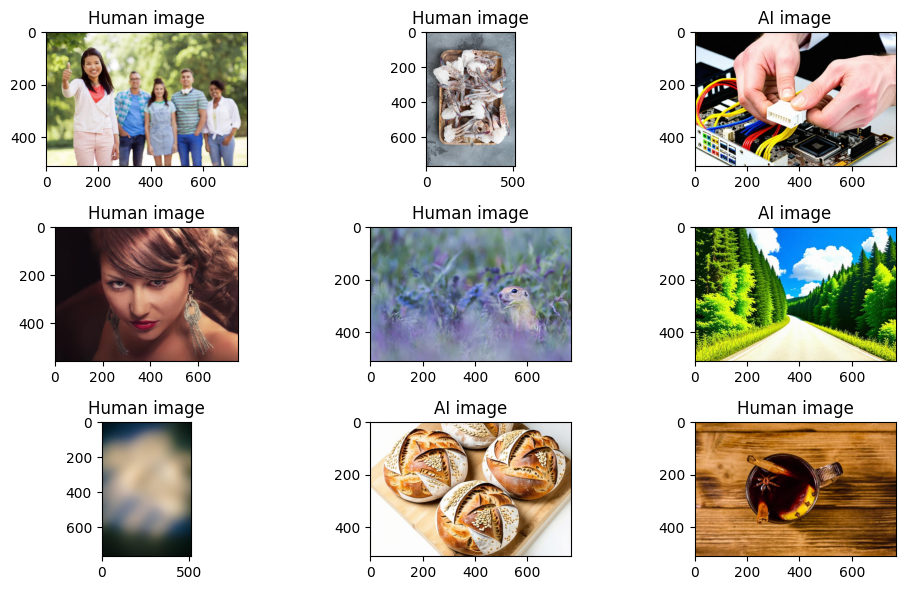

In [ ]:
np.random.seed(1)
random_idxs = np.random.choice(len(train_df), size=9, replace=False)

plt.figure(figsize=(10,6))

for i, idx in enumerate(random_idxs, 1):
  path = train_paths[idx]
  label = train_df['label'].iloc[idx]

  img = Image.open(path)
  plt.subplot(3, 3, i)
  plt.imshow(img)
  plt.title("Human image" if label == 0 else "AI image")

plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
img_width, img_height = 200, 200
input_shape = (img_width, img_height, 3)
batch_size = 64

In [ ]:
train_df['label'] = train_df['label'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = dataset_path,
    x_col = 'file_name',
    y_col = 'label',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 55965 validated image filenames belonging to 2 classes.


In [ ]:
valid_df['label'] = valid_df['label'].astype(str)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    directory = dataset_path,
    x_col = 'file_name',
    y_col = 'label',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 11992 validated image filenames belonging to 2 classes.


In [ ]:
test_df['label'] = test_df['label'].astype(str)

test_generator = valid_datagen.flow_from_dataframe(
    test_df,
    directory = dataset_path,
    x_col = 'file_name',
    y_col = 'label',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size=batch_size,
    shuffle=False
)

Found 11993 validated image filenames belonging to 2 classes.


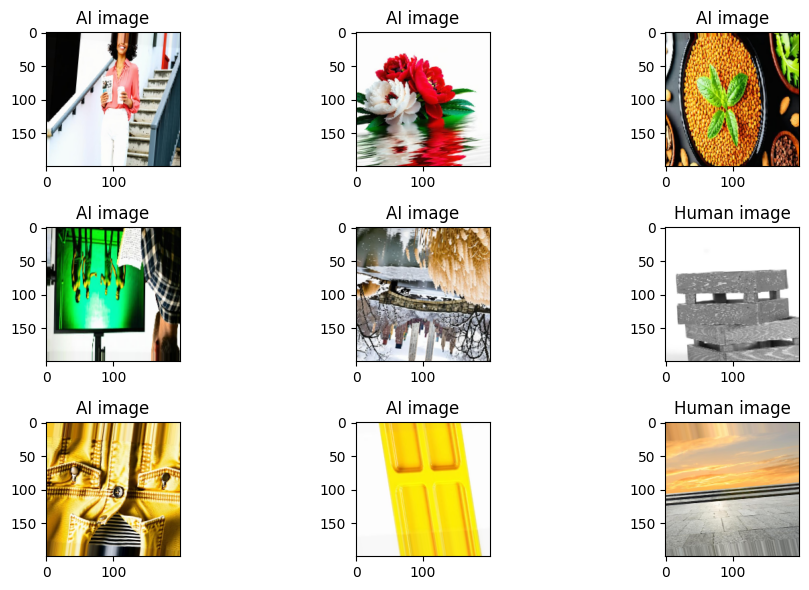

In [ ]:
images, labels = next(train_generator)

plt.figure(figsize=(10,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.title("Human image" if labels[i] == 0 else "AI image")

plt.tight_layout()
plt.show()

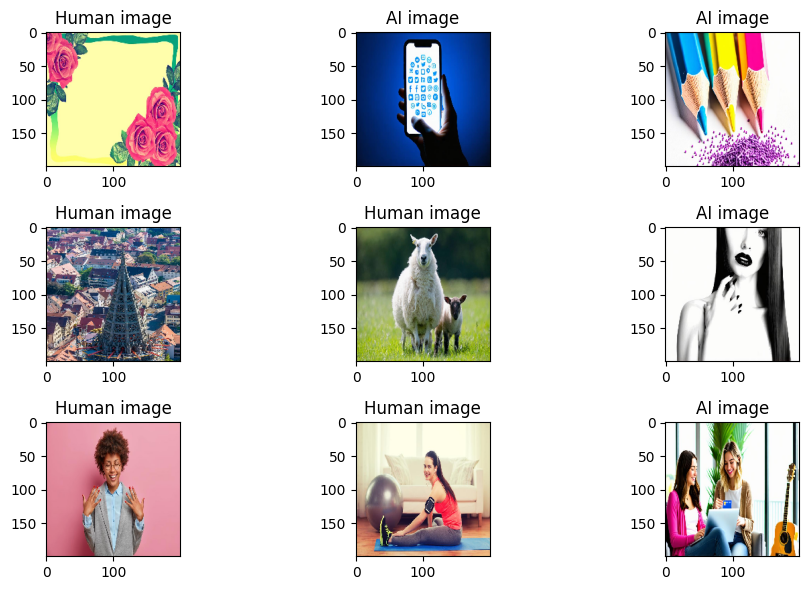

In [ ]:
images, labels = next(valid_generator)

plt.figure(figsize=(10,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.title("Human image" if labels[i] == 0 else "AI image")

plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,120,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,174,209 (19.74 MB)

 Trainable params: 5,174,209 (19.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 30

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data = valid_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 888s 1000ms/step - accuracy: 0.7817 - loss: 0.4691 - val_accuracy: 0.8505 - val_loss: 0.3443
Epoch 2/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 663s 758ms/step - accuracy: 0.8979 - loss: 0.2595 - val_accuracy: 0.8509 - val_loss: 0.3886
Epoch 3/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 664s 758ms/step - accuracy: 0.9085 - loss: 0.2367 - val_accuracy: 0.8753 - val_loss: 0.3622
Epoch 4/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 664s 759ms/step - accuracy: 0.9159 - loss: 0.2202 - val_accuracy: 0.9195 - val_loss: 0.2152
Epoch 5/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 661s 755ms/step - accuracy: 0.9217 - loss: 0.2075 - val_accuracy: 0.8707 - val_loss: 0.3812
Epoch 6/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 664s 759ms/step - accuracy: 0.9262 - loss: 0.1951 - val_accuracy: 0.8846 - val_loss: 0.3729
Epoch 7/30
875/875 ━━━━━━━━━━━━━━━━━━━━ 669s 765ms/step - accuracy: 0.9287 - loss: 0.1846 - val_accuracy: 0.9075 - val_loss: 0.2724


In [ ]:
model.evaluate(test_generator)

188/188 ━━━━━━━━━━━━━━━━━━━━ 78s 417ms/step - accuracy: 0.9176 - loss: 0.2192


[0.22015835344791412, 0.9161177277565002]

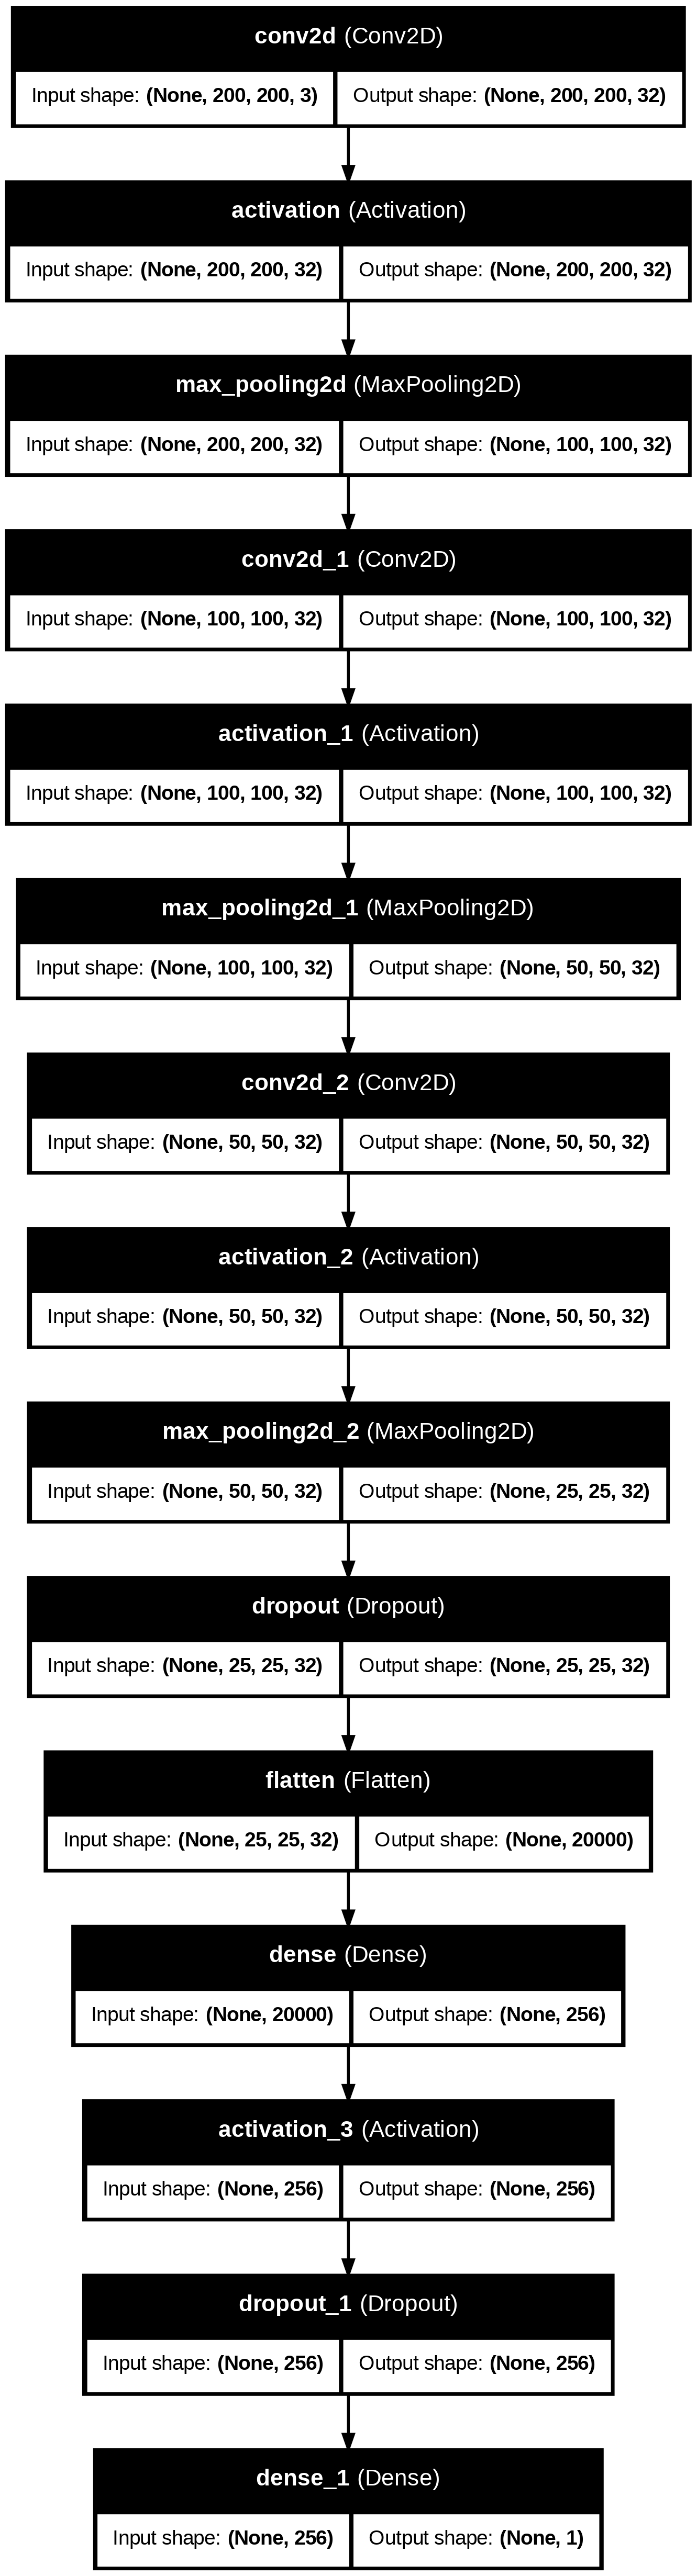

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

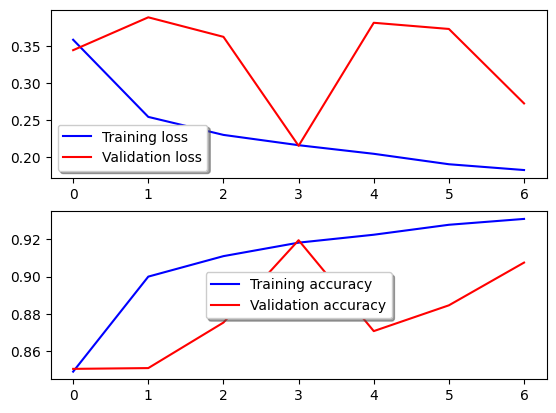

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(test_generator)
y_true = test_generator.classes

# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human image", "AI image"])
# disp.plot()
# plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

print(f"accuracy: {accuracy_score(y_pred, y_true)}")
print(f"precision:{precision_score(y_pred, y_true)}")
print(f"recall: {recall_score(y_pred, y_true)}")

accuracy: 0.9325439839906612
precision:0.9326217478318879
recall: 0.9324662331165583


In [ ]:
auc_precision_recall = roc_auc_score(y_true, y_pred_prob)
print("AUC: %.3f" % auc_precision_recall)

AUC: 0.978


In [ ]:
from sklearn.metrics import auc
fpr, tpr, treshold = roc_curve(y_true, y_pred_prob)
roc_auc_val = auc(fpr, tpr)

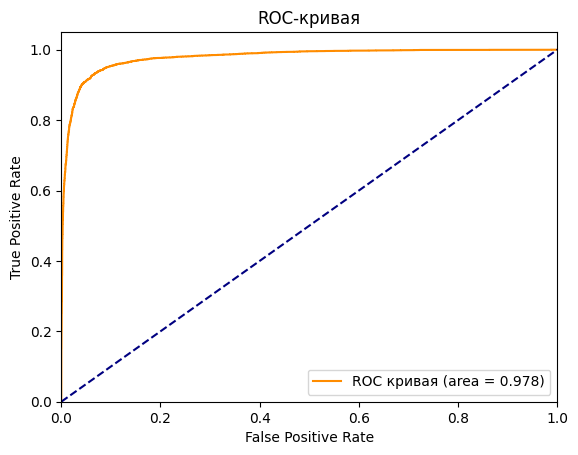

In [ ]:
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.3f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

(0.0, 1.0)

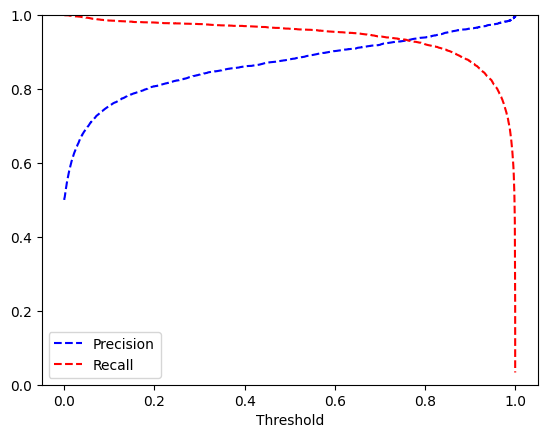

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_true, y_pred_prob, pos_label=1)

plt.figure()
plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "r--", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

In [ ]:
thr_inter = 0.001
for i, p in enumerate(precision):
    if np.abs(p - recall[i]) < thr_inter:
        print(threshold[i])

0.7586966
0.7589141
0.75914025
0.75948477
0.7596391
0.76011944
0.76026946
0.7609674
0.7610701
0.76112264
0.7612391
0.76154
0.7616102


188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step


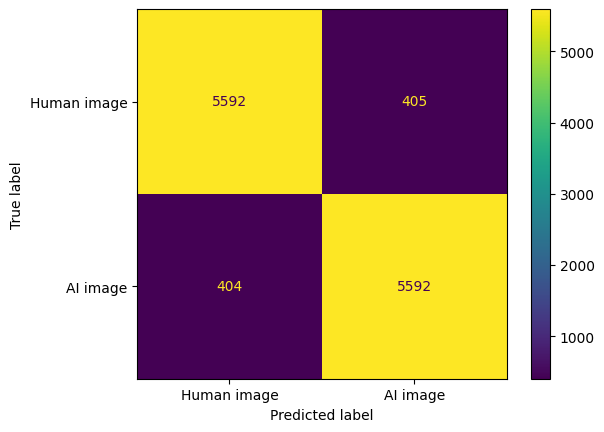

In [ ]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.76).astype(int).ravel()
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human image", "AI image"])
disp.plot()
plt.show()